In [1]:
import pylab as pl
import numpy as np
import matplotlib.mlab as ml
from scipy import interpolate
from collections import OrderedDict

In [2]:
points = np.loadtxt('Fe-kslice-coord.dat')
# Avoid numerical noise
points_x=np.around(points[:,0],decimals=10)
points_y=np.around(points[:,1],decimals=10)
num_pt=len(points)

In [3]:
area=    4.792898

In [4]:
square= True     

In [5]:
if square:
  x_coord=list(OrderedDict.fromkeys(points_x))
  y_coord=list(OrderedDict.fromkeys(points_y))
  dimx=len(x_coord)
  dimy=len(y_coord)
else:
  xmin=np.min(points_x)
  ymin=np.min(points_y)
  xmax=np.max(points_x)
  ymax=np.max(points_y)
  a=np.max(np.array([xmax-xmin,ymax-ymin]))
  num_int=int(round(np.sqrt(num_pt*a**2/area)))
  xint = np.linspace(xmin,xmin+a,num_int)
  yint = np.linspace(ymin,ymin+a,num_int)

In [6]:
# Energy level for isocontours (typically the Fermi level)
ef=   12.627900

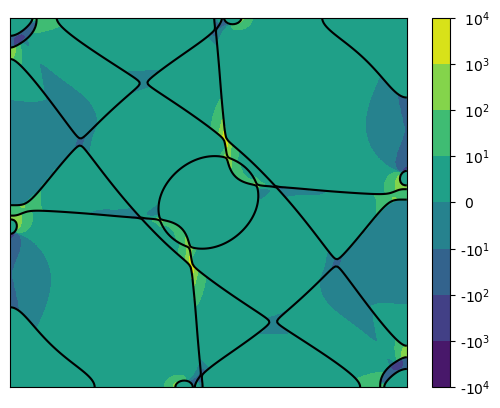

In [7]:
bands=np.loadtxt('Fe-kslice-bands.dat')
numbands=bands.size//num_pt
if square:
  bbands=bands.reshape((dimy,dimx,numbands))
  for i in range(numbands):
    Z=bbands[:,:,i]
    pl.contour(x_coord,y_coord,Z,[ef],colors='black')
else:
  bbands=bands.reshape((num_pt,numbands))
  bandint=[]
  grid_x, grid_y = np.meshgrid(xint,yint)
  for i in range(numbands):
    bandint.append(interpolate.griddata((points_x,points_y), bbands[:,i], (grid_x,grid_y), method='nearest'))
    pl.contour(grid_x,grid_y,bandint[i],[ef],colors='black')

outfile = 'Fe_kslice.pdf'
 
val = np.loadtxt('Fe-kslice-curv.dat', usecols=(2,))
 
val_log=np.array([np.log10(abs(elem))*np.sign(elem) if abs(elem)>10 else elem/10.0 for elem in val])

if square: 
  Z=val_log.reshape(dimy,dimx)
  mn=int(np.floor(Z.min()))
  mx=int(np.ceil(Z.max()))
  ticks=range(mn,mx+1)
  pl.contourf(x_coord,y_coord,Z,ticks,origin='lower')
  #pl.imshow(Z,origin='lower',extent=(min(x_coord),max(x_coord),min(y_coord),max(y_coord)))
else: 
  valint = ml.griddata(points_x,points_y, val_log, xint, yint)
  mn=int(np.floor(valint.min()))
  mx=int(np.ceil(valint.max()))
  ticks=range(mn,mx+1)
  pl.contourf(xint,yint,valint,ticks)
  #pl.imshow(valint,origin='lower',extent=(min(xint),max(xint),min(yint),max(yint)))
 
ticklabels=[]
for n in ticks:
 if n<0: 
  ticklabels.append('-$10^{%d}$' % abs(n))
 elif n==0:
  ticklabels.append(' $%d$' %  n)
 else:
  ticklabels.append(' $10^{%d}$' % n)
 
cbar=pl.colorbar()
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticklabels)
 
ax = pl.gca()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
 
pl.savefig(outfile,bbox_inches='tight')
pl.show()